# Overview

The project for Machine learning has the goal to create a End-to-End project using teh knowlages during the cource using a data set selected by myself.

This is only a test

# Target of the Project

In [1]:
%matplotlib inline

In [2]:
import re
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import seaborn as sns

import mlflow.sklearn

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.decomposition import PCA

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_fscore_support

from sklearn.svm import SVC

import mlflow
from mlflow.models import infer_signature




# Data Set
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
https://www.kaggle.com/datasets/rajkumarpandey02/electric-vehicle-population-data/data



# Workflow To Be Followed

- Step 1: Loading The Dataset
- Step 2: Performing EDA
- Step 3: Feature Engineering
- Step 4: Model Training & Evaluation 

Preparing and run the mlflow instance to log the results of the experements. For each run is set a name of the run with the changes or the target of the run

In [3]:
#experiment = mlflow.create_experiment(name = "DecisionTreeClassifier_Pipeline")
# If the experement exist
#experiment = mlflow.get_experiment_by_name("LinearRegression_Pipeline")
#experiment = mlflow.get_experiment_by_name("SVC_Pipeline")
experiment = mlflow.get_experiment_by_name("DecisionTreeClassifier_Pipeline")
#experiment_id = experiment.experiment_id
#experiment = mlflow.set_experiment("LinearRegression_Pipeline")

In [4]:
#run_name="LinerRegression_PL_09"
run_name="DecisionTreeClassifier_PL_01"
description = """
### LinerRegression Run
Changes and adaptations:
- Run DecisionTreeClassifier
- Use RandomizedSearchCV
"""

run = mlflow.start_run(experiment_id = experiment.experiment_id, run_name=run_name, description=description)

## Step 1: Loading The Dataset

In [5]:
# Load the data set
electric_vehicles = pd.read_csv("data/Electric_Vehicle_Population_Data_old.csv")

# Data Preprocessing

The data set contains 17 colums 
1. VIN (1-10)
2. County 	
3. City
4. State
5. Postal Code
6. Model Year
7. Make
8. Model
9. Electric Vehicle Type
10. Clean Alternative Fuel Vehicle (CAFV) Eligibility
11. Electric Range
12. Base MSRP
13. Legislative District
14. DOL Vehicle ID
15. Vehicle Location
16. Electric Utility
17. 2020 Census Tract

In [6]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


Check the data type of each column. Which column is has the data type object and which has the data type of number (float64 and int64)

In [7]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         124716 non-null  object 
 1   County                                             124714 non-null  object 
 2   City                                               124714 non-null  object 
 3   State                                              124716 non-null  object 
 4   Postal Code                                        124714 non-null  float64
 5   Model Year                                         124716 non-null  int64  
 6   Make                                               124716 non-null  object 
 7   Model                                              124535 non-null  object 
 8   Electric Vehicle Type                              124716 non-null  object

In [8]:
#Check for each column if null/None/NaN is existing 
electric_vehicles.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                181
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      29
Electric Utility                                     473
2020 Census Tract                                      2
dtype: int64

Drop the NaN rows (8 rows)

In [9]:
#electric_vehicles = electric_vehicles.dropna(subset=['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract'])

In [10]:
#electric_vehicles.isnull().sum()

As we can see in some of the colums NaN are existing. The NaN will be manage for each Column separately. 
The easier way be not eliminate for the complete data set all rows which contains NaN. It is beeter first to analyse each column with NaN values before to drop all NaN values
with the function __dropna()__
We can assume that the columns _County_, _City_ and _Postal Code_ have NaN in the same rows, because of the dependancies between _Country_, _City_ and _Postal Code_ 

# Feature Engineering

## Definition of all global functions
TODO Morve to sepaaret file

In [11]:
def add_priority_numbers(df, column_name):
    column_counts = df[column_name].value_counts()
    total_number_of_unique = len(column_counts)
    priority_numbers = {value: total_number_of_unique - rank + 1 for rank, value in enumerate(column_counts.index, start=1)}
    df[column_name + '_priority'] = df[column_name].map(priority_numbers)
    return df

def fill_in_colum_with_unknown(df, column_name):
    column_values = df[column_name].fillna('Unknown')
    df[column_name] = column_values
    return  df

def fill_in_colum_with_postal_code_unknown(df):
    column_values = df['Postal Code'].fillna('00000.0')
    df['Postal Code'] = column_values
    return  df

def execute_one_hod_encoder(df, column_name):
    ohe_make = OneHotEncoder()
    encoded_cafv = ohe_make.fit_transform(df[column_name].values.reshape(-1, 1)).toarray()
    ohe_df = pd.DataFrame(encoded_cafv, columns=ohe_make.get_feature_names_out())
    df = pd.concat([df, ohe_df], axis=1)
    return df

def convert_vin_number_to_hach(df, column_name):
    #column_counts = df[column_name].value_counts()
    #total_number_of_unique = len(column_counts)
    #hash_numbers = {hash(value) for value in df[column_name]}
    df[column_name] = df[column_name].apply(lambda value: hash(value))
    #df[column_name] = hash_numbers
    return df

## Feature - VIN (1-10)

Check the unique values of the feature __VIN (1-10)__

In [12]:
len(electric_vehicles['VIN (1-10)'].unique())

8340

If you can see we have 9058 unique values. Using using One-Hot Encoding can lead to a high-dimensional and sparse representation, 
which may pose challenges in terms of computational efficiency and memory usage.

In [13]:
electric_vehicles['VIN (1-10)'].value_counts()

VIN (1-10)
5YJYGDEE9M    463
5YJYGDEE0M    460
5YJYGDEE7M    453
5YJYGDEE8M    440
5YJYGDEE2M    431
             ... 
WA1M2BFZ4N      1
7JRBR0FL8L      1
1FT6W1EV1P      1
3FMTK4SE0P      1
1C4RJYB61P      1
Name: count, Length: 8340, dtype: int64

Create a Pipeline for the feature __VIN (1 -10)__

In [14]:
vin_pipeline = Pipeline(steps = [
    ('ohn_vin', FunctionTransformer(func= convert_vin_number_to_hach, kw_args={'column_name':'VIN (1-10)'})),
])

In [15]:
#electric_vehicles = vin_pipeline.fit_transform(electric_vehicles)

Using the OneCodeEncoding for the feature __VIN__ got the MemmoryError: Unable to allocate 9.11 GiB for an array with shape (9059, 135038) and data type float64

In [16]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [17]:
#electric_vehicles['VIN (1-10)'].value_counts()

In [18]:
#electric_vehicles['VIN (1-10)'].info()

## Features - County, City and State

Let us look at the column __Country__.
First we should check  the unique values of  the column 'Country' and to print the table (rows) only with the NaN values to see which information will be lost if we drop this rows.

In [19]:
electric_vehicles['County'].isnull().sum()

2

In [20]:
countries_null_rows = electric_vehicles[electric_vehicles['County'].isna()]
countries_null_rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
104754,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
106559,5YJ3E1EA5K,NaN,NaN,BC,NaN,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,475254825,NaN,NaN,NaN


In [21]:
#electric_vehicles['County'] = electric_vehicles['County'].fillna('Unknown')

In [22]:
electric_vehicles['County'].isnull().sum()

2

In [23]:
electric_vehicles['County'].unique()

array(['Yakima', 'San Diego', 'Lane', 'Snohomish', 'Kitsap', 'Thurston',
       'Riverside', 'Kern', 'Grant', 'Skagit', 'King', 'Chelan', 'Island',
       'Whitman', 'Stevens', 'Spokane', 'Walla Walla', 'Adams', 'Pierce',
       'Clark', 'Pacific', 'Whatcom', 'Cowlitz', 'Kittitas', 'San Juan',
       'Jefferson', 'Lewis', 'Clallam', 'Grays Harbor', 'Benton',
       'Klickitat', 'Douglas', 'Mason', 'Franklin', 'Sonoma', 'Skamania',
       'Okanogan', 'Columbia', 'Pulaski', 'Pend Oreille', 'Kootenai',
       'Harrison', 'Asotin', 'Bell', 'Los Angeles', 'Montgomery',
       'San Bernardino', 'Lincoln', 'Charleston', 'Maricopa',
       'Anne Arundel', 'Wahkiakum', 'Santa Clara', 'Orange', 'Ferry',
       'Santa Cruz', 'Saratoga', 'Bartow', 'Cape May', 'Cumberland',
       'Arapahoe', 'Richmond', 'El Paso', 'Solano', 'Stafford',
       'St. Tammany', 'Oldham', 'Fairfax', 'Frederick', 'Salt Lake',
       'New London', 'Middlesex', 'Nassau', 'Tarrant', 'New Haven',
       'Burlington', 'Okalo

In [24]:
electric_vehicles['County'].value_counts()

County
King         65268
Snohomish    14061
Pierce        9538
Clark         7404
Thurston      4548
             ...  
Camden           1
Vernon           1
Newport          1
Dallas           1
Laramie          1
Name: count, Length: 166, dtype: int64

If we can see there are 170 countries. Now is the question, how we can transform the countries to a number as categories? If we use the __LabelEncoder__ provided by the sklearn library, so
all countries will be assign to unique numerical label in the feature. The problem is that __LabelEncoder__ is appropriate when there is an ordinal relationship between the categories (i.e., one category is greater than or less than another). In our case this can be a problem for some of the machine algorithms, because using __LabelEncoder__ might introduce unintended relationships in the model. 
Another option is to use __OneHotEncoder__. OneHotEncoder is used to convert categorical integer features into one-hot encoded vectors. Each integer value is represented as a binary vector where all values are zero except the index that is marked with a 1. In our case we will inscrease the features with additiolan 170 features. This can be a problem, because of the heigh varians by the learning the model.
So this two solutions maybe are not the correct solution for the column __Country__. So what we want to acheaved? Mainly we want to present the rank of each country base on the saled vehicles in this country. This will be provide us the posibility to clarify how importent is each country and to set the priority of each country.

In [25]:
#def add_priority_numbers(df, column_name):
#    column_counts = df[column_name].value_counts()
#    total_number_of_unique = len(column_counts)
#    priority_numbers = {value: total_number_of_unique - rank + 1 for rank, value in enumerate(column_counts.index, start=1)}
#    df[column_name + '_priority'] = df[column_name].map(priority_numbers)
#    return df


#def fill_in_colum_with_unknown(df, column_name):
#    column_values = df[column_name].fillna('Unknown')
#    df[column_name] = column_values
#    return  df


In [26]:
country_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'County'})),
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'County'})),
    #('create_matrix', FunctionTransformer(func= lambda x: x.todence()))
])

In [27]:
#country_pipeline.fit_transform(electric_vehicles)

In [28]:
electric_vehicles['County'].isnull().sum()

2

In [29]:
city_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'City'})),
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'City'})),
])

In [30]:
state_pipeline = Pipeline(steps = [
    ('add_priority_numbers', FunctionTransformer(func= add_priority_numbers, kw_args={'column_name':'State'})),
])

## Feature - Postal Code

In [31]:
#def fill_in_colum_with_postal_code_unknown(df):
#    column_values = df['Postal Code'].fillna('00000.0')
#    df['Postal Code'] = column_values
#    return  df

In [32]:
postal_code_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_postal_code_unknown)),
])

## Feature - Vehicle Location

In [33]:
electric_vehicles[electric_vehicles['Vehicle Location'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
5588,1N4BZ1CP7K,Pierce,Wilkeson,WA,98396.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,31.0,476833899,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
7262,JN1AZ0CP1B,King,Seattle,WA,98124.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,11.0,101502166,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
12989,3FMTK4SE6M,Pierce,Wilkeson,WA,98396.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,181410736,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
14103,JN1AZ0CP0B,King,Seattle,WA,98124.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,11.0,165560762,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
15353,3FMTK4SE4N,Thurston,Olympia,WA,98504.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,213445004,NaN,PUGET SOUND ENERGY INC,5.306701e+10
20062,3FMTK2SU3N,Thurston,Olympia,WA,98504.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,219271216,NaN,PUGET SOUND ENERGY INC,5.306701e+10
21361,3FMTK2SU4N,Thurston,Olympia,WA,98504.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,216554257,NaN,PUGET SOUND ENERGY INC,5.306701e+10
24896,1N4AZ0CP4D,Pierce,Kapowsin,WA,98344.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,2.0,237061968,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
25185,3FMTK2SU3N,Thurston,Olympia,WA,98504.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,216702503,NaN,PUGET SOUND ENERGY INC,5.306701e+10
30143,3FA6P0PU2D,Pierce,Wilkeson,WA,98396.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,31.0,226631765,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10


For 8 of the vehicle location can not be find out the correct location, becase the __county__, __city__ and __state__ are missing. 
There are two options 
- to drop the rows or
- to define a __Unknow__ state for points: __POINT (000.00000000000000 00.00000000000000)__

Option two will be use , becasue of the strategy following until now to replace NaN with __Unkonow__ values dependace of the format.

In [34]:

# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

# unpack the coordinates 
def unpack_coordinates(df):
    # Convert the 'Vehicle Location' column to string type
    df['Vehicle Location'] = df['Vehicle Location'].astype(str)
    df['Longitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
    df['Latitude'] = df['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
    return df


#df = df.dropna(subset=['latitude', 'longitude'])


def fill_in_colum_with_point_unknown(df):
    column_values = df['Vehicle Location'].fillna('POINT (000.00000000000000 00.00000000000000)')
    df['Vehicle Location'] = column_values
    return  df
    
#electric_vehicles['Longitude'] = electric_vehicles['Vehicle Location'].apply(func=lambda x: x.x)
#electric_vehicles['Latitude'] = electric_vehicles['Vehicle Location'].apply(func=lambda x: x.y)

Create a Pipeline for the feature __Vehicle Location__

In [35]:
vehicle_location_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_point_unknown', FunctionTransformer(func= fill_in_colum_with_point_unknown)),
    ('unpack_vehicle_location', FunctionTransformer(func= unpack_coordinates))
])

Add to the feture Pipeline

## Feature - Base MSRP

The coulumn __Base MSRP__ contanins more as 95% of zeror or 95% of the information about the price is missing. 

In [36]:
electric_vehicles['Base MSRP'].value_counts()

Base MSRP
0         121323
69900       1433
31950        402
52900        167
32250        156
54950        138
59900        127
39995        120
44100         98
36900         98
64950         88
33950         80
45600         74
34995         63
52650         61
36800         51
55700         48
53400         35
98950         22
110950        21
81100         19
90700         17
75095         16
102000        15
184400        12
43700         11
109000         7
89100          6
91250          4
32995          3
845000         1
Name: count, dtype: int64

In [37]:
electric_vehicles['Base MSRP'].isnull().sum()

0

Replace the NaN with zero

In [38]:
def fill_in_colum_with_zero(df, column_name, to_fill_value):
    column_values = df[column_name].fillna(to_fill_value)
    df[column_name] = column_values
    return  df

In [39]:
electric_vehicles[electric_vehicles['Base MSRP'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [40]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if 0 <= price <= 25000 :
            return 0
        elif 25000 < price <= 40000:
            return 1
        elif 40000 < price <= 60000:
            return 2
        else:
            return 3

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

Create a Pipeline for the feature __Base MSRP__

In [41]:
base_msrp_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Base MSRP', 'to_fill_value': 0})),
    ('create_price_range_category', FunctionTransformer(func= create_price_range_category))
])

## Feature - Legislative District

In [42]:
electric_vehicles['Legislative District'].isnull().sum()

297

In [43]:
electric_vehicles['Legislative District'].value_counts()

Legislative District
41.0    8416
45.0    7834
48.0    7108
36.0    5612
1.0     5345
5.0     5228
46.0    5087
43.0    5002
37.0    3878
34.0    3749
11.0    3475
18.0    3331
22.0    3091
32.0    3040
44.0    3039
21.0    2950
40.0    2870
23.0    2830
26.0    2491
33.0    2400
10.0    2237
31.0    2152
17.0    2131
47.0    2121
27.0    1835
24.0    1805
39.0    1774
42.0    1771
35.0    1755
49.0    1747
28.0    1618
30.0    1424
2.0     1328
8.0     1317
25.0    1202
38.0    1185
6.0     1131
12.0    1112
20.0    1066
4.0      952
13.0     819
14.0     794
29.0     775
19.0     732
9.0      675
16.0     672
3.0      618
7.0      594
15.0     301
Name: count, dtype: int64

Unknown will be set to 0 ,bcause the values if start with 1

In [44]:
electric_vehicles['Legislative District'].min()

1.0

In [45]:
electric_vehicles['Legislative District'].max()

49.0

Create a pipeline for the column __Legislative District__

In [46]:
legislative_district_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Legislative District', 'to_fill_value': 0})),
])

# Feature - Electric Range

 First filter only the electirc range with value > 0 for the calculation of the mean value. 
Calculate the mean value of the electic range in depandance of the Clean Alternative Fuel Vehicle (CAFV) Eligibility 	
and the Model. So you can calculate the mean value base of the information if the vehicle is a hybrid or electic an base of the model
because each model has different range.

In [47]:
#electric_range_without_zero = electric_vehicle_type["Electric Range"].ne(0)
#electric_range_without_zero = electric_vehicle_type[electric_vehicle_type[['Electric Range']].ne(0).any(1)]
#electric_range_without_zero = electric_vehicle_type[electric_vehicle_type[['Electric Range']].ne(0).any(1)]
electric_range_without_zero = electric_vehicles[electric_vehicles['Electric Range'] != 0.0]

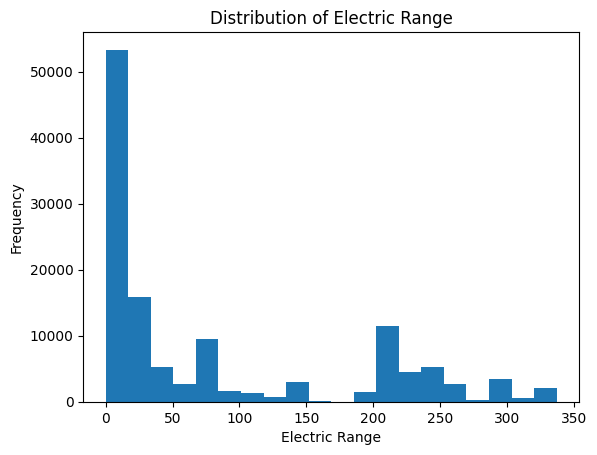

In [48]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

In [49]:
electric_range_only_zero = electric_vehicles[electric_vehicles['Electric Range'] == 0.0]

In [50]:
electric_range_only_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
11,KNDC3DLCXN,Thurston,Olympia,WA,98502.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,202289321,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
30,5YJ3E1EB9M,Yakima,Yakima,WA,98908.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,177950790,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
34,7SAYGAEE2N,Yakima,Selah,WA,98942.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,218937288,POINT (-120.53113 46.65404),PACIFICORP,5.307700e+10
78,7SAYGDEE6N,Whitman,Pullman,WA,99163.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,9.0,213421428,POINT (-117.18147 46.73015),AVISTA CORP,5.307500e+10
80,5YJYGDEE7M,Stevens,Chewelah,WA,99109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,7.0,150190505,POINT (-117.71555 48.28136),AVISTA CORP,5.306595e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124706,YV4ED3GB7N,Pierce,Tacoma,WA,98422.0,2022,VOLVO,C40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,204890073,POINT (-122.41666 47.30682),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
124709,WA1VAAGE9M,Whatcom,Bellingham,WA,98229.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,152586290,POINT (-122.45516 48.74487),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124710,5YJ3E1EAXM,Snohomish,Lynnwood,WA,98037.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,32.0,233874014,POINT (-122.27734 47.83785),PUGET SOUND ENERGY INC,5.306105e+10
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10


In [51]:
electric_range_without_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124707,1C4RJYC61N,Grant,Ephrata,WA,98823.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,13.0,224079530,POINT (-119.55125 47.31867),PUD NO 2 OF GRANT COUNTY,5.302501e+10
124708,WBY1Z4C54G,King,Seattle,WA,98144.0,2016,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,37.0,148555137,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [52]:
#electric_vehicle_type.iloc[:, electric_vehicle_type_index] = electric_vehicle_type["Electric Range"].mask(electric_vehicle_type["Electric Range"].eq(0.0), electric_vehicle_type["Electric Range"].mean())
#group_electrical_range = electric_range_without_zero.groupby(['Model','Make', 'Electric Vehicle Type'], as_index=False)['Electric Range'].mean()
#group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Make'], as_index=False)['Electric Range'].mean()
group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Model'], as_index=False)['Electric Range'].mean()

TODO Analyse the results with Model, why is not good to use a Model als groupby

In [53]:
group_electrical_range

,Electric Vehicle Type,Model,Electric Range
0,Battery Electric Vehicle (BEV),500,85.633333
1,Battery Electric Vehicle (BEV),B-CLASS,87.000000
2,Battery Electric Vehicle (BEV),BOLT EV,243.613920
3,Battery Electric Vehicle (BEV),CITY,100.000000
4,Battery Electric Vehicle (BEV),E-GOLF,106.746154
...,...,...,...
88,Plug-in Hybrid Electric Vehicle (PHEV),WRANGLER,22.067422
89,Plug-in Hybrid Electric Vehicle (PHEV),X3,17.000000
90,Plug-in Hybrid Electric Vehicle (PHEV),X5,25.375741
91,Plug-in Hybrid Electric Vehicle (PHEV),XC60,20.823171


In [54]:
group_electrical_range.Model.unique()

array(['500', 'B-CLASS', 'BOLT EV', 'CITY', 'E-GOLF', 'E-TRON',
       'E-TRON SPORTBACK', 'EQ FORTWO', 'FOCUS', 'FORTWO',
       'FORTWO ELECTRIC DRIVE', 'HARDTOP', 'I-MIEV', 'I-PACE', 'I3',
       'IONIQ', 'KONA', 'LEAF', 'MODEL 3', 'MODEL S', 'MODEL X',
       'MODEL Y', 'NIRO', 'PS2', 'RANGER', 'RAV4', 'ROADSTER',
       'S-10 PICKUP', 'SOUL', 'SOUL EV', 'SPARK', 'TAYCAN',
       'TRANSIT CONNECT ELECTRIC', '330E', '530E', '740E', '745E',
       '745LE', '918', 'A3', 'A7', 'A8 E', 'ACCORD', 'AVIATOR',
       'BENTAYGA', 'C-CLASS', 'C-MAX', 'CAYENNE', 'CLARITY', 'CORSAIR',
       'COUNTRYMAN', 'CROSSTREK', 'CT6', 'ELR', 'ESCAPE', 'FLYING SPUR',
       'FUSION', 'GLC-CLASS', 'GLE-CLASS', 'GRAND CHEROKEE', 'I8',
       'KARMA', 'NX', 'OPTIMA', 'OUTLANDER', 'PACIFICA', 'PANAMERA',
       'PRIUS PLUG-IN', 'PRIUS PRIME', 'Q5', 'Q5 E', 'RANGE ROVER',
       'RANGE ROVER SPORT', 'RAV4 PRIME', 'S-CLASS', 'S60', 'S90',
       'SANTA FE', 'SONATA', 'SORENTO', 'SPORTAGE', 'TUCSON', 'V60',
    

In [55]:
#group_electrical_range.Make.unique()

In [56]:
#for index, row in group_electrical_range.iterrows():
#    electric_vehicles.loc[ electric_vehicles['Electric Range'] > 0.0 and electric_vehicles['Model'] == row['Model'], 'Electric Range'] = row['Electric Range']

for index, row in group_electrical_range.iterrows():
#    mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Make'] == row['Make'])
#    electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']
   
    
    mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Model'] == row['Model'])
    electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']

C:\Users\David_Ninov\AppData\Local\Temp\ipykernel_12872\2989595879.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '85.63333333333334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']


In [57]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.000000,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289.000000,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.000000,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,237.857266,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.000000,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,291.000000,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.000000,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [58]:

def calculate_mean_value(df):
    electric_range_without_zero = df[df['Electric Range'] != 0.0]
    electric_range_only_zero = df[df['Electric Range'] == 0.0]
    group_electrical_range = electric_range_without_zero.groupby(['Electric Vehicle Type', 'Make'], as_index=False)['Electric Range'].mean()

    for index, row in group_electrical_range.iterrows():
        mask = (df['Electric Range'] == 0.0) & (df['Make'] == row['Make'])
        df.loc[mask, 'Electric Range'] = row['Electric Range']
        #mask = (electric_vehicles['Electric Range'] == 0.0) & (electric_vehicles['Model'] == row['Model'])
        #electric_vehicles.loc[mask, 'Electric Range'] = row['Electric Range']
    return df



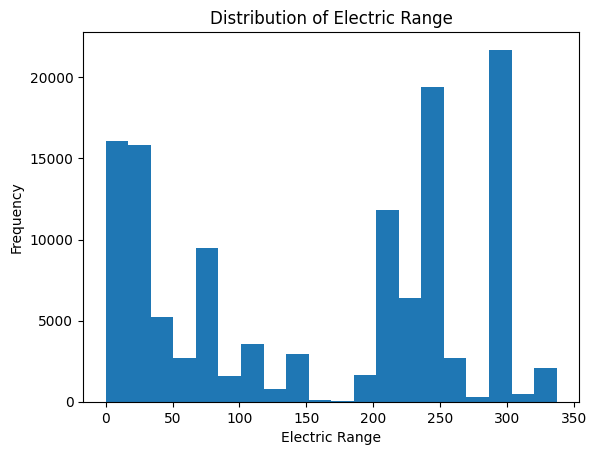

In [59]:
plt.hist(electric_vehicles['Electric Range'], bins=20)
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

Now the number of 0 is reduce from 60.. to XXX. The reason why not all 0s are 
How to mange the rest of the unkown or zeros values?
- Is it possible to find statistic values add there to the set?
- Is it possible to use another grpouping to replace the zeris values? 

In [60]:
electric_range_only_zero = electric_vehicles[electric_vehicles['Electric Range'] == 0.0]

In [61]:
electric_range_only_zero

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
11,KNDC3DLCXN,Thurston,Olympia,WA,98502.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,22.0,202289321,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
89,7FCEHDB7XN,Kitsap,Bremerton,WA,98312.0,2022,RIVIAN,EDV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,35.0,205695171,POINT (-122.66122 47.56573),PUGET SOUND ENERGY INC,5.303509e+10
111,JTMABABA3P,Spokane,Spokane Valley,WA,99212.0,2023,SUBARU,SOLTERRA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,4.0,228299074,POINT (-117.3186 47.6505),BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATI...,5.306301e+10
127,WA1H2BFZ3N,King,Seattle,WA,98112.0,2022,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,43.0,220569142,POINT (-122.30716 47.62687),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
145,7FCTGAAA5N,Whatcom,Bellingham,WA,98226.0,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,40.0,224673291,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124656,3FMTK3SU4N,King,Issaquah,WA,98027.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,41.0,223928736,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
124668,KNDC3DLC4N,Franklin,Eltopia,WA,99330.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,9.0,209230570,POINT (-119.01647 46.45698),BONNEVILLE POWER ADMINISTRATION||BIG BEND ELEC...,5.302102e+10
124677,1FTBW9CK8N,Snohomish,Edmonds,WA,98026.0,2022,FORD,TRANSIT,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,32.0,205969151,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10
124695,YV4ED3UB8N,King,Bothell,WA,98011.0,2022,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0,1.0,187332743,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [62]:
electric_range_only_zero['Make'].unique()

array(['KIA', 'RIVIAN', 'SUBARU', 'AUDI', 'VOLVO', 'BMW', 'VOLKSWAGEN',
       'CHEVROLET', 'FORD', 'HYUNDAI', 'MERCEDES-BENZ', 'LUCID MOTORS',
       'TOYOTA', 'CADILLAC', 'NISSAN', 'GENESIS', 'LEXUS'], dtype=object)

In [63]:
electric_vehicles['Electric Range'].eq(0)

0         False
1         False
2         False
3         False
4         False
          ...  
124711    False
124712    False
124713    False
124714    False
124715    False
Name: Electric Range, Length: 124716, dtype: bool

In [64]:
def plot_value_counts(df, column, top_n=None):
    # Get the value counts for the specified column
    value_counts = df[column].value_counts()
    
    if top_n:
        value_counts = value_counts.head(top_n)
    
    # Set up the subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    # Create the pie chart
    value_counts.plot(kind='pie', ax=axes[0], autopct='%.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[0].set_ylabel('')
    axes[0].set_title(f'Percentage of {column}', fontsize=14)
    
    # Create the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')
    axes[1].set_title(f'Count of {column}', fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=30)

    for i, v in enumerate(value_counts.values):
        axes[1].text(i, v + 0.5, str(v), horizontalalignment='center', fontsize=12)
    
    # Set the suptitle for the entire figure
    fig.suptitle(f'{column} Distribution', fontsize=18, y=1.03)
    
    # Show the plots
    plt.show()

C:\Users\David_Ninov\AppData\Local\Temp\ipykernel_12872\3406674573.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1], palette='pastel')


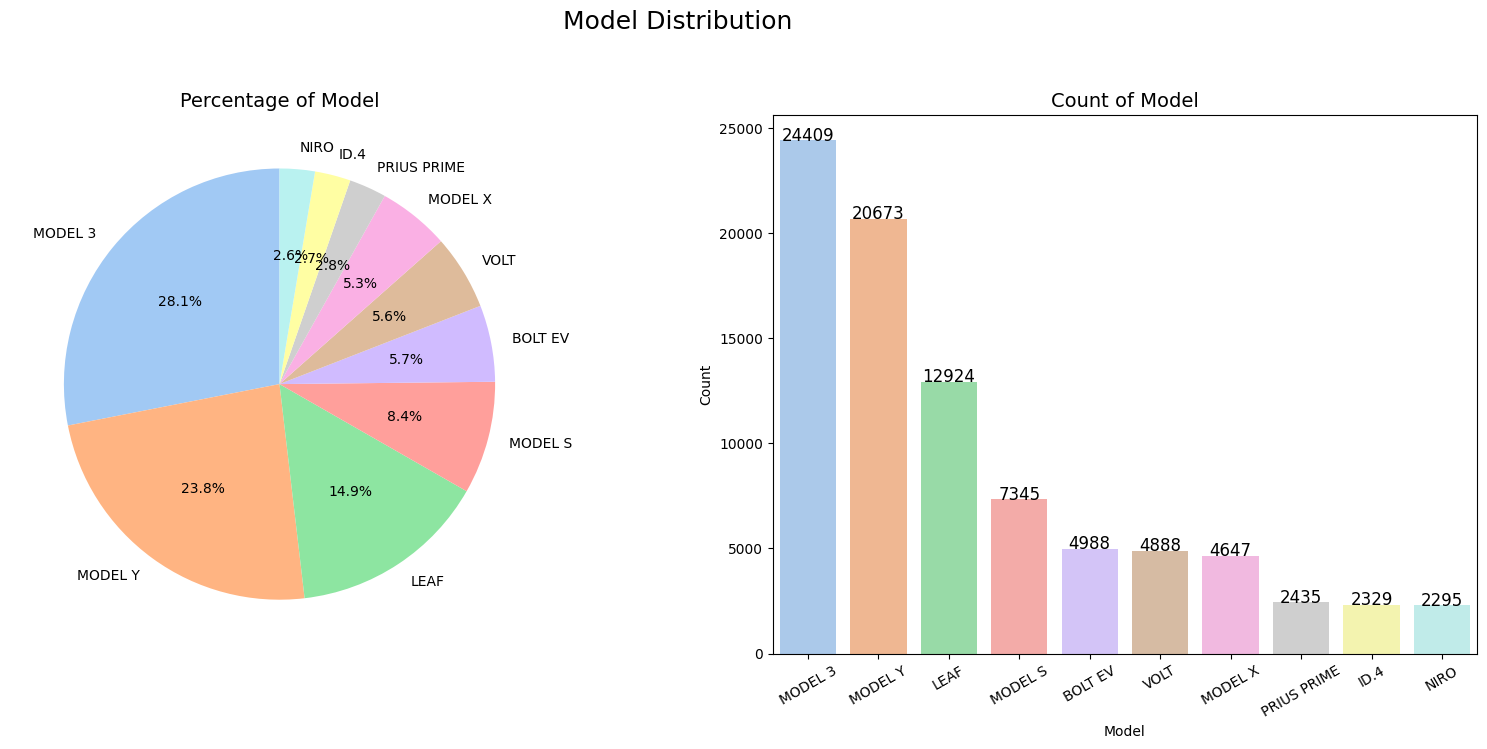

In [65]:
plot_value_counts(electric_vehicles, 'Model', top_n=10)

## Feature Engineering - Electric Range

In [66]:
# Plug-in Hybrid Electric Vehicle (PHEV) = 1
# Battery Electric Vehicle (BEV) = 0
PHEV = 'Plug-in Hybrid Electric Vehicle (PHEV)'
BEV = 'Battery Electric Vehicle (BEV)'
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(columns):
        electric_range = columns['Electric Range']
        electric_vehicle_type = columns['Electric Vehicle Type']
        if electric_range == 0:
            return 0
        elif 0.0 < electric_range < 50 and electric_vehicle_type == BEV:
            return 1 #10 #very Short
        elif 50 <= electric_range <= 100 and electric_vehicle_type == BEV:
            return 2 #20 #Short
        elif 100 < electric_range <= 300 and electric_vehicle_type == BEV:
            return 3 #30 #Medium
        elif 300 < electric_range <= 550 and electric_vehicle_type == BEV:
            return 4 #40 #long
        elif 550 < electric_range and electric_vehicle_type == BEV:
            return 5 #50 # Extry long
        elif electric_range < 10 and electric_vehicle_type == PHEV:
            return 1 #very Short
        elif 10 <= electric_range <= 50 and electric_vehicle_type == PHEV:
            return 2 #Short
        elif 50 < electric_range <= 80 and electric_vehicle_type == PHEV:
            return 3 #Medium
        elif 80 < electric_range <= 160 and electric_vehicle_type == PHEV:
            return 4 #long
        elif 160 < electric_range and electric_vehicle_type == PHEV:
            return 5 # Extry lo
        else:
            return -1.0

    df['Electric_Range_Category'] = df.apply(categorize_range, axis=1)
    return df


In [67]:
#pd.get_dummies(electric_vehicles[["Electric Vehicle Type","Electric_Range_Category"]])

In [68]:
#electric_vehicles.dropna(subset=["Electric Range"])
electric_vehicles = electric_vehicles[electric_vehicles['Electric Range'].notna()]

In [69]:
electric_vehicles['Electric Range'].isna().sum()

0

Create a Pipeline for __Electric Range__

In [70]:
electric_range_feature_pipeline = Pipeline(steps = [
    ('fill_in_with_zero', FunctionTransformer(func = fill_in_colum_with_zero, kw_args={'column_name':'Electric Range', 'to_fill_value': 0})), 
     ('calculate_mean_value', FunctionTransformer(func = calculate_mean_value)),
    ('electric_range_category', FunctionTransformer(func = create_electric_range_category, kw_args={'column':'Electric Range'})),
])

## Feature - 2020 Census Tract

In [71]:
electric_vehicles = electric_vehicles.dropna(subset=['2020 Census Tract'])

In [72]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.000000,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289.000000,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.000000,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,237.857266,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.000000,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,291.000000,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.000000,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [73]:
features_vehicles_pipeline = FeatureUnion([
    ('country_feature', country_pipeline),
    ('city_feature', city_pipeline),
    ('state_feature', state_pipeline), 
    ('code_pipeline_feature', postal_code_pipeline),
    ('vehicle_location_feature', vehicle_location_feature_pipeline),
    ('base_msrp_feature', base_msrp_feature_pipeline),
    ('legislative_district_feature', legislative_district_feature_pipeline),
    ('electric_range_feature', electric_range_feature_pipeline), 
    ('vin_feature', vin_pipeline),
    #('make_feature', make_pipeline),
    #('cafv_feature', cafv_pipeline),
    #('model_feature', model_pipeline),
    #('electric_vehicle_type_feature', electric_vehicle_type_pipeline),
    #('electric_vehicles_feature', electric_vehicles),
    
])

In [74]:
features_vehicles_pipeline.fit(electric_vehicles)

FeatureUnion(transformer_list=[('country_feature',
                                Pipeline(steps=[('fill_na',
                                                 FunctionTransformer(func=<function fill_in_colum_with_unknown at 0x00000218AD79B6A0>,
                                                                     kw_args={'column_name': 'County'})),
                                                ('add_priority_numbers',
                                                 FunctionTransformer(func=<function add_priority_numbers at 0x00000218AD79B880>,
                                                                     kw_args={'column_name': 'County'}))])),
                               ('city_feature',
                                Pi...
                                                 FunctionTransformer(func=<function calculate_mean_value at 0x00000218AE3FE520>)),
                                                ('electric_range_category',
                                                 FunctionTransformer(func=<function create_electric_range_category at 0x00000218AEE02020>,
                                                                     kw_args={'column': 'Electric '
                                                                                        'Range'}))])),
                               ('vin_feature',
                                Pipeline(steps=[('ohn_vin',
                                                 FunctionTransformer(func=<function convert_vin_number_to_hach at 0x00000218AD79BB00>,
                                                                     kw_args={'column_name': 'VIN '
                                                                                             '(1-10)'}))]))])

In [75]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.000000,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.000000,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289.000000,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.000000,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,5YJ3E1EB6N,Snohomish,Monroe,WA,98272.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,237.857266,0,39.0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC,5.306105e+10
124712,KNDCM3LD2L,Pierce,Tacoma,WA,98406.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.000000,0,27.0,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
124713,7SAYGDEE0P,Whatcom,Bellingham,WA,98226.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,291.000000,0,42.0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
124714,1G1FW6S03J,Pierce,Tacoma,WA,98444.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.000000,0,29.0,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [76]:
features_vehicles_pipeline.transform(electric_vehicles)

array([[-7319856525529851978, 'Yakima', 'Yakima', ..., -120.56916, 0, 4],
       [-3860978140869946146, 'San Diego', 'San Diego', ..., -117.16171,
        0, 3],
       [2680046202825968883, 'Lane', 'Eugene', ..., -123.12802, 0, 2],
       ...,
       [2236689700273893505, 'Whatcom', 'Bellingham', ..., -122.49756, 0,
        3],
       [8840334149041549885, 'Pierce', 'Tacoma', ..., -122.46495, 0, 3],
       [-840894910133187435, 'Benton', 'Benton City', ..., -119.48756, 0,
        2]], dtype=object)

In [77]:
electric_vehicles.head

<bound method NDFrame.head of                  VIN (1-10)     County         City State  Postal Code  \
0      -7319856525529851978     Yakima       Yakima    WA      98908.0   
1      -3860978140869946146  San Diego    San Diego    CA      92101.0   
2       2680046202825968883       Lane       Eugene    OR      97404.0   
3        -14107960330964478     Yakima       Yakima    WA      98908.0   
4       2177816061022486013  Snohomish      Bothell    WA      98021.0   
...                     ...        ...          ...   ...          ...   
124711  5560019678562867372  Snohomish       Monroe    WA      98272.0   
124712  9136270288081897901     Pierce       Tacoma    WA      98406.0   
124713  2236689700273893505    Whatcom   Bellingham    WA      98226.0   
124714  8840334149041549885     Pierce       Tacoma    WA      98444.0   
124715  -840894910133187435     Benton  Benton City    WA      99320.0   

        Model Year       Make    Model  \
0             2020      TESLA  MODEL 3 

In [78]:
electric_vehicles['Electric_Range_Category']

0         4
1         3
2         2
3         3
4         2
         ..
124711    3
124712    2
124713    3
124714    3
124715    2
Name: Electric_Range_Category, Length: 124714, dtype: int64

## Feature Model

In the column __Model__ are listest the models of makes. First we have to analyse if the column __Model__ contains NaN values

In [79]:
electric_vehicles.Model.isnull().sum()

181

There are 249 rows with the the value NaN in the column __Model__. Now we have to check for each make (column __Make__) the model is missing.

In [80]:
electric_vehicles_make_with_NaN = electric_vehicles[electric_vehicles['Model'].isna()]

In [81]:
electric_vehicles_make_with_NaN

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,Vehicle Location,Electric Utility,2020 Census Tract,County_priority,City_priority,State_priority,Longitude,Latitude,Price_Range_Category,Electric_Range_Category
926,-3635340102960922032,King,Bellevue,WA,98006.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.12096 47.55584),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,166,650,43,-122.12096,-122.12096,0,1
2362,-146773476156035507,King,Issaquah,WA,98029.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.00292 47.54748),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,166,640,43,-122.00292,-122.00292,0,1
2735,-805170198582650608,Snohomish,Bothell,WA,98021.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,165,646,43,-122.18384,-122.18384,0,1
2866,-4970841343214547969,King,Redmond,WA,98052.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,166,649,43,-122.13158,-122.13158,0,1
4461,-4089959243151051164,King,Seattle,WA,98146.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.36178 47.49408),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,166,651,43,-122.36178,-122.36178,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120078,-5320016991908848519,King,Seattle,WA,98125.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.3026 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,166,651,43,-122.30260,-122.30260,0,1
121595,-5320016991908848519,King,Woodinville,WA,98072.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,166,636,43,-122.15545,-122.15545,0,1
121654,-3635340102960922032,Snohomish,Edmonds,WA,98026.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10,165,631,43,-122.31768,-122.31768,0,1
122264,-7295190335377472297,King,Seattle,WA,98106.0,2023,VOLVO,NaN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,POINT (-122.35163 47.54287),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,166,651,43,-122.35163,-122.35163,0,1


In [82]:
electric_vehicles_make_with_NaN['Make']

926       VOLVO
2362      VOLVO
2735      VOLVO
2866      VOLVO
4461      VOLVO
          ...  
120078    VOLVO
121595    VOLVO
121654    VOLVO
122264    VOLVO
123855    VOLVO
Name: Make, Length: 181, dtype: object

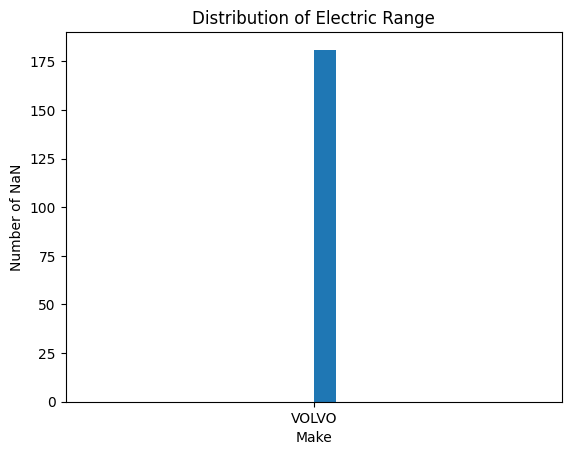

In [83]:
plt.hist(electric_vehicles_make_with_NaN['Make'], bins=20)
plt.xlabel('Make')
plt.ylabel('Number of NaN')
plt.title('Distribution of Electric Range')
plt.show()

If we can see the missing models are only from one __Make__ _Volvo_. We can delete this 240 rows, but we will lost information. So for the first loop the NaN will be replace with the value __Unknown__

The next step is to anylyse how we can catagorize the unique values of the __Models__ to numbers, that the machine leanring algorithmus can understand correctly.

In [84]:
len(electric_vehicles.Model.unique())

121

Now the question is which technic we can use fot the categorarization:
- OneHotEncoder - in this case we will create additional 126 colums. Later if needed we can reduce the number of the columns using another algorithmns and strategy to get better results.
- LabelEncoder - LabelEncoder could imply an ordinal relationship between the __Models__, which might not be accurate
- Set the Priority like the solution for __Country__, __City__ and __State__ - More as one model can have the same priority.
- another solution

First we will try with __OneHotEncoder__, because of the probems of the another solutions, that can be follow the missunderstanding the data by the learning process.

In [85]:
electric_vehicles.Model.value_counts()

Model
MODEL 3        24408
MODEL Y        20673
LEAF           12924
MODEL S         7345
BOLT EV         4988
               ...  
BENTAYGA           2
RZ 450E            1
918                1
FLYING SPUR        1
S-10 PICKUP        1
Name: count, Length: 120, dtype: int64

Create a pipeline for the frature __Model__

In [86]:
model_pipeline = Pipeline(steps = [
    ('fill_na', FunctionTransformer(func= fill_in_colum_with_unknown, kw_args={'column_name': 'Model'})),
    ('ohn_model', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Model'})),
])

In [87]:
electric_vehicles = model_pipeline.fit_transform(electric_vehicles)

In [88]:
electric_vehicles.shape

(124716, 145)

## Feature - Make 	

In [89]:
electric_vehicles.Make.unique()

array(['TESLA', 'VOLVO', 'BMW', 'NISSAN', 'MERCEDES-BENZ', 'KIA',
       'CHEVROLET', 'FORD', 'MINI', 'TOYOTA', 'FIAT', 'RIVIAN', 'SUBARU',
       'AUDI', 'PORSCHE', 'JEEP', 'HYUNDAI', 'CHRYSLER', 'VOLKSWAGEN',
       'HONDA', 'SMART', 'LINCOLN', 'MITSUBISHI', 'CADILLAC', 'POLESTAR',
       'JAGUAR', 'LUCID MOTORS', 'LEXUS', 'LAND ROVER', 'GENESIS',
       'FISKER', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'TH!NK',
       'BENTLEY', nan], dtype=object)

In [90]:
len(electric_vehicles.Make.unique())

36

In [91]:
electric_vehicles.Make.isnull().sum()

2

In [92]:
#def execute_one_hod_encoder(df, column_name):
#    ohe_make = OneHotEncoder()
#    encoded_cafv = ohe_make.fit_transform(df[column_name].values.reshape(-1, 1)).toarray()
#    ohe_df = pd.DataFrame(encoded_cafv, columns=ohe_make.get_feature_names_out())
#    df = pd.concat([df, ohe_df], axis=1)
#    return df

    

In [93]:
make_pipeline = Pipeline(steps = [
    ('ohn_make', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Make'})),
])

#make_pipeline_ct = ColumnTransformer([
    #('ohe_make', OneHotEncoder(), ['Make']),
#    ('ohn_make', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Make'}), ['Make']),
    
#])

In [94]:
electric_vehicles = make_pipeline.fit_transform(electric_vehicles)

Check if the number of the columns is increase with the number of the makes (36 unique makes)

In [95]:
electric_vehicles.shape

(124716, 181)

## Feature - Clean Alternative Fuel Vehicle (CAFV) Eligibility

In [96]:
electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched',
       nan], dtype=object)

In [97]:
cafv_pipeline = Pipeline(steps = [
    ('ohn_cafv', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Clean Alternative Fuel Vehicle (CAFV) Eligibility'})),
])

In [98]:
electric_vehicles = cafv_pipeline.fit_transform(electric_vehicles)

In [99]:
electric_vehicles.shape

(124716, 185)

## Feature - Electric Vehicle Type

In [100]:
electric_vehicles['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)', nan], dtype=object)

In [101]:
electric_vehicle_type_pipeline = Pipeline(steps = [
    ('ohn_electric_vehicle_type', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Electric Vehicle Type'})),
])

In [102]:
electric_vehicles = electric_vehicle_type_pipeline.fit_transform(electric_vehicles)

In [103]:
electric_vehicles.shape

(124716, 188)

## Feature - Electric Utility

Is this feature relevant? Here we need to do text spliting

In the first step the text should be analysed ad checkt each information can be importent and is possible to split it. There are 76 unique __-Electric Utility__. Now is the question is each of then
is a


In [104]:
electric_vehicles['Electric Utility'].unique()

array(['PACIFICORP', nan, 'PUGET SOUND ENERGY INC',
       'PUD NO 2 OF GRANT COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUD NO 1 OF CHELAN COUNTY', 'AVISTA CORP',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF PACIFIC COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF MILTON - (WA)|CITY OF TACOMA - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||ORCAS POWER & LIGHT COOP',
    

In [105]:
electric_vehicles['Electric Utility'].value_counts()

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                 44995
PUGET SOUND ENERGY INC                                                                                        24674
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                  23317
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                               7229
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                5609
                                                                                                              ...  
BONNEVILLE POWER ADMINISTRATION||CITY OF COULEE DAM - (WA)                                                        2
BONNEVILLE POWER ADMINISTRATION||PENINSULA LIGHT COMPANY                                                          1
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COU

In [106]:
len(electric_vehicles['Electric Utility'].unique())

74

Create a pipeline with OneHodEncoder

In [107]:
electric_utility_pipeline = Pipeline(steps = [
    ('ohn_electric_utility', FunctionTransformer(func= execute_one_hod_encoder, kw_args={'column_name':'Electric Utility'})),
])

In [108]:
electric_vehicles = electric_utility_pipeline.fit_transform(electric_vehicles)

In [109]:
electric_vehicles.shape

(124716, 262)

In [110]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,x0_PUD NO 1 OF CHELAN COUNTY,x0_PUD NO 1 OF DOUGLAS COUNTY,x0_PUD NO 1 OF OKANOGAN COUNTY,x0_PUD NO 1 OF PEND OREILLE COUNTY,x0_PUD NO 1 OF WHATCOM COUNTY,x0_PUD NO 2 OF GRANT COUNTY,x0_PUGET SOUND ENERGY INC,x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,x0_nan
0,-7.319857e+18,Yakima,Yakima,WA,98908.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.860978e+18,San Diego,San Diego,CA,92101.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.680046e+18,Lane,Eugene,OR,97404.0,2021.0,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.410796e+16,Yakima,Yakima,WA,98908.0,2019.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.177816e+18,Snohomish,Bothell,WA,98021.0,2017.0,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124713,2.236690e+18,Whatcom,Bellingham,WA,98226.0,2023.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124714,8.840334e+18,Pierce,Tacoma,WA,98444.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
124715,-8.408949e+17,Benton,Benton City,WA,99320.0,2015.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
electric_vehicles = electric_vehicles.dropna(axis=0)

In [112]:
electric_vehicles.isnull().sum()

VIN (1-10)                                               0
County                                                   0
City                                                     0
State                                                    0
Postal Code                                              0
                                                        ..
x0_PUD NO 2 OF GRANT COUNTY                              0
x0_PUGET SOUND ENERGY INC                                0
x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)         0
x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY    0
x0_nan                                                   0
Length: 262, dtype: int64

In [113]:
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,x0_PUD NO 1 OF CHELAN COUNTY,x0_PUD NO 1 OF DOUGLAS COUNTY,x0_PUD NO 1 OF OKANOGAN COUNTY,x0_PUD NO 1 OF PEND OREILLE COUNTY,x0_PUD NO 1 OF WHATCOM COUNTY,x0_PUD NO 2 OF GRANT COUNTY,x0_PUGET SOUND ENERGY INC,x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,x0_nan
0,-7.319857e+18,Yakima,Yakima,WA,98908.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.410796e+16,Yakima,Yakima,WA,98908.0,2019.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.177816e+18,Snohomish,Bothell,WA,98021.0,2017.0,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.748999e+18,Snohomish,Everett,WA,98201.0,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,6.532423e+18,Kitsap,Poulsbo,WA,98370.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124709,-6.014163e+18,Whatcom,Bellingham,WA,98229.0,2021.0,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
124710,6.097504e+17,Snohomish,Lynnwood,WA,98037.0,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124711,5.560020e+18,Snohomish,Monroe,WA,98272.0,2022.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
124712,9.136270e+18,Pierce,Tacoma,WA,98406.0,2020.0,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#columns_to_drop = ['County', 'City', 'State', 'Postal Code']
#df = df.drop(columns=columns_to_drop)

RANDOM_STATE = 42
TEST_SIZE = 0.3

#Add to pipeline
col_model_year_index = electric_vehicles.columns.get_loc("Model Year")
electric_vehicles.iloc[:, col_model_year_index] = pd.to_numeric(electric_vehicles['Model Year'], errors="ignore") 

#print(electric_vehicles.dtypes)

#assenger_attributes.drop(columns = ["PassengerId", "Name", "Cabin"])
#X = electric_vehicles[['Base MSRP', "Model Year", 'City', 'State', 'County','Make', 'Model', 'Electric Range']]
electric_vehicles_attributes = electric_vehicles.drop(columns=['County', 'City', 'State', 'Make', 'Model',
            'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP', 'Electric Range', 'Electric Utility', 'Vehicle Location','Electric_Range_Category'])
#X = electric_vehicles.drop(columns = ['Electric Range'])

electric_vehicles_labels = electric_vehicles['Electric_Range_Category']
#scaler = MinMaxScaler()
#y = scaler.fit_transform(electric_vehicles['Electric_Range_Category'])

electric_vehicles_attributes_train, electric_vehicles_attributes_test, electric_vehicles_labels_train, electric_vehicles_labels_test = \
train_test_split(electric_vehicles_attributes, electric_vehicles_labels, test_size=TEST_SIZE, random_state=RANDOM_STATE)

#linear_model = LogisticRegression(C = 1e10)
#model = LogisticRegression(C = 10e9)
#linear_model.fit(X_train, y_train)

#y_pred = linear_model.predict(X_test)

In [115]:
electric_vehicles_attributes.head

<bound method NDFrame.head of           VIN (1-10)  Postal Code  Model Year  Legislative District  \
0      -7.319857e+18      98908.0      2020.0                  14.0   
3      -1.410796e+16      98908.0      2019.0                  14.0   
4       2.177816e+18      98021.0      2017.0                   1.0   
5       1.748999e+18      98201.0      2015.0                  38.0   
6       6.532423e+18      98370.0      2018.0                  23.0   
...              ...          ...         ...                   ...   
124709 -6.014163e+18      98229.0      2021.0                  40.0   
124710  6.097504e+17      98037.0      2021.0                  32.0   
124711  5.560020e+18      98272.0      2022.0                  39.0   
124712  9.136270e+18      98406.0      2020.0                  27.0   
124713  2.236690e+18      98226.0      2023.0                  42.0   

        DOL Vehicle ID  2020 Census Tract  County_priority  City_priority  \
0          127175366.0       5.307700e+1

In [116]:
electric_vehicles_attributes.isnull().sum()

VIN (1-10)                                               0
Postal Code                                              0
Model Year                                               0
Legislative District                                     0
DOL Vehicle ID                                           0
                                                        ..
x0_PUD NO 2 OF GRANT COUNTY                              0
x0_PUGET SOUND ENERGY INC                                0
x0_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)         0
x0_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY    0
x0_nan                                                   0
Length: 250, dtype: int64

Find out the number of the __n_components__
TBD

In [117]:
electric_vehicles_attributes_train.shape[1]

250

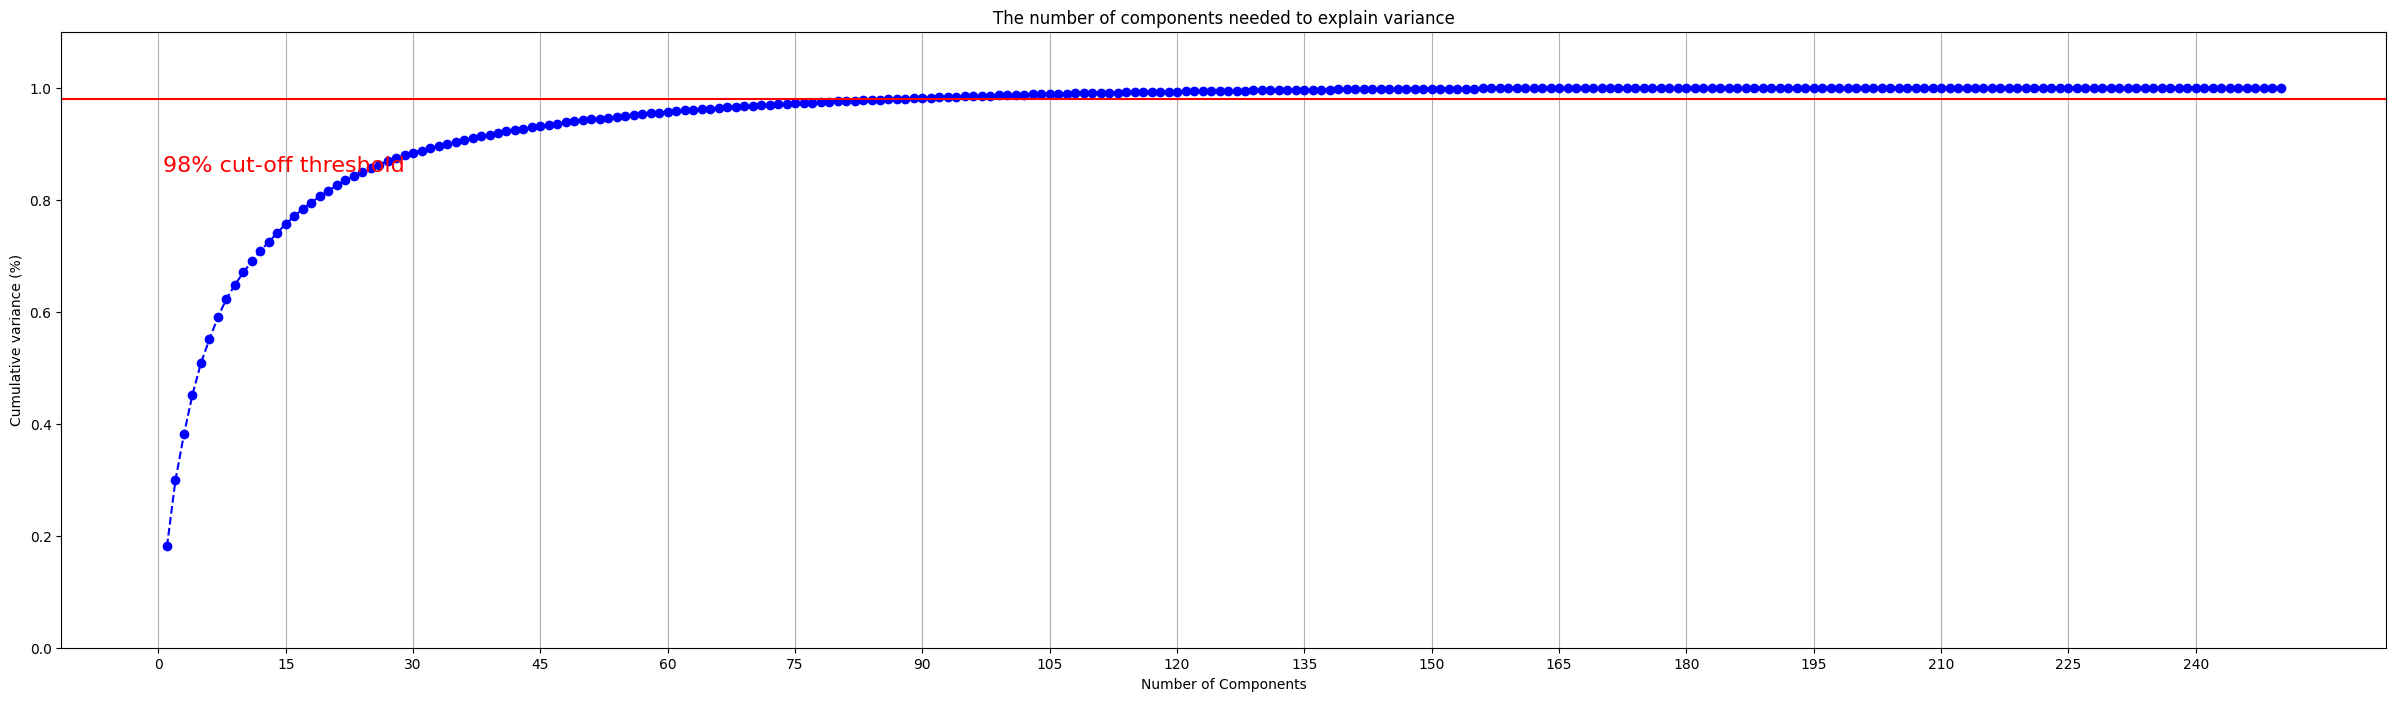

In [118]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(electric_vehicles_attributes_train)
number_of_train_features = electric_vehicles_attributes_train.shape[1]

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (30,8)

fig, ax = plt.subplots()
xi = np.arange(1, number_of_train_features  + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, number_of_train_features , step=15))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 0.85, '98% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Base on the results the __n_components__ schould be between 50 and 60. We wll use the value 60.

In [119]:
N_COMPONENTS = 90 #60 check the run 8

vehicles_pipeline = Pipeline( steps = [
    #('features', features_vehicles_pipeline), 
    ('scaling', MinMaxScaler()),
    ('psa', PCA(n_components=N_COMPONENTS)),
    #('model_logistic_regression', LogisticRegression()),
]) 


In [120]:
vehicles_pipeline.fit(electric_vehicles_attributes_train, electric_vehicles_labels_train)

Pipeline(steps=[('scaling', MinMaxScaler()), ('psa', PCA(n_components=90))])

In [121]:
# each of these models will take a turn as the second Pipeline step
#clf1 = LogisticRegression(solver='liblinear', random_state=1)
clf_lg = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf_svc = SVC(random_state=1)
clf_dtc = DecisionTreeClassifier(random_state=1)



In [122]:
# create the Pipeline
#pipe = Pipeline([('preprocessor', vehicles_pipeline), ('classifier', clf_lg)])
pipe_classifier = Pipeline(steps = [('preprocessor', vehicles_pipeline), ('classifier', clf_dtc)])



__Remark__: using the params1['classifier__max_iter'] = [1000] the fit process took a lot of time (mose as 12 hours and the fit process was not done)

In [123]:
# create the parameter dictionary for LogisticRegression

#‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
#‘liblinear’ and ‘saga’ also handle L1 penalty

params_lr = {
    'classifier__penalty': ['l2'],
    'classifier__C':  [0.001, 0.01, 0.1, 1, 10, 100, 1000.0, 1e10],
    'classifier': [clf_lg]
}

#params1['classifier__penalty'] = ['l2']
#params1['classifier__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000.0, 1e10]
#params1['classifier__solver'] = ['liblinear', 'lbfgs']
#params1['classifier__max_iter'] = [100]
#params1['classifier'] = [clf1]



In [124]:
# create the parameter dictionary for clf2 -RandomForestClassifier
params2 = {}
params2['classifier__n_estimators'] = [100, 200]
params2['classifier__min_samples_leaf'] = [1, 2]
params2['classifier'] = [clf2]

In [125]:
# create the parameter dictionary for SVC
param_range_svc = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 1e10]

param_svc = [{'classifier__C': param_range_svc, 
                'classifier__kernel': ['linear'],
              'classifier': [clf_svc]
             },  
             {'classifier__C': param_range_svc, 
               'classifier__gamma': param_range_svc, 
               'classifier__kernel': ['rbf'],
               'classifier': [clf_svc]
             }]


In [126]:
param_dtc = {
    'classifier__max_depth': [2,5,10,18,20,25,30, None],
    'classifier': [clf_dtc]
}

In [127]:
# create a list of parameter dictionaries
#params = [params_lr]
#params = param_svc
params = [param_dtc]
#params = [params1, params2]

In [128]:


#param_grid = {
#    'model_logistic_regression__penalty': ['l1', 'l2'],
#    'model_logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1e10],
#    'model_logistic_regression__solver': ['liblinear', 'lbfgs'],
#    'model_logistic_regression__max_iter': [100],
#    'model_logistic_regression__n_components': [60],
#}



# this will search every parameter combination within each dictionary
#grid = GridSearchCV(pipe, params)
#grid.fit(X, y)
#grid.best_params_



#grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=100), param_grid, cv=5)
#grid_search = GridSearchCV(pipe, params, cv=5)
#grid_search = GridSearchCV(pipe_classifier, params, scoring='accuracy', cv=10)
grid_search = RandomizedSearchCV(pipe_classifier, params, cv=5)
grid_search.fit(electric_vehicles_attributes_train, electric_vehicles_labels_train)


C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              Pipeline(steps=[('scaling',
                                                               MinMaxScaler()),
                                                              ('psa',
                                                               PCA(n_components=90))])),
                                             ('classifier',
                                              DecisionTreeClassifier(random_state=1))]),
                   param_distributions=[{'classifier': [DecisionTreeClassifier(random_state=1)],
                                         'classifier__max_depth': [2, 5, 10, 18,
                                                                   20, 25, 30,
                                                                   None]}])

In [141]:
print(f"Feature Importances: {grid_search.feature_importances_}")

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [142]:
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'classifier__max_depth': 18, 'classifier': DecisionTreeClassifier(random_state=1)}


In [143]:
print("Best score: ", grid_search.best_score_)

Best score:  0.9218793122655018


In [144]:
grid_search.cv_results_

{'mean_fit_time': array([ 5.96993861, 10.82206149, 19.32411151, 31.33638444, 34.91368427,
        38.43550038, 44.53529196, 69.64545345]),
 'std_fit_time': array([0.21101706, 0.1774037 , 0.54225798, 0.72266702, 1.05205863,
        1.25790776, 1.51983834, 3.01672092]),
 'mean_score_time': array([0.07923584, 0.08638353, 0.08862782, 0.09000793, 0.08729391,
        0.08422441, 0.08600368, 0.0872541 ]),
 'std_score_time': array([0.00202448, 0.004093  , 0.00842142, 0.00526848, 0.00315647,
        0.00321127, 0.00497721, 0.00289511]),
 'param_classifier__max_depth': masked_array(data=[2, 5, 10, 18, 20, 25, 30, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier': masked_array(data=[DecisionTreeClassifier(random_state=1),
                    DecisionTreeClassifier(random_state=1),
                    DecisionTreeClassifier(random_state=1),
                    DecisionTreeClassifier(random_sta

In [145]:
electric_vehicles_labels_pred = grid_search.predict(electric_vehicles_attributes_test)

In [146]:
electric_vehicles_labels_pred

array([3., 3., 1., ..., 2., 3., 2.])

In [147]:
grid_search.score(electric_vehicles_attributes_train, electric_vehicles_labels_train)

0.9696440069910772

In [148]:
grid_search.score(electric_vehicles_attributes_test, electric_vehicles_labels_test)

0.9251737182410861

In [149]:
grid_search.best_index_

3

In [151]:
scores = cross_val_score(pipe_classifier, electric_vehicles_attributes_train, electric_vehicles_labels_train, cv=10, scoring='accuracy', n_jobs=1)

In [152]:
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.90295504 0.90238013 0.9083592  0.91215362 0.90456479 0.90433483
 0.90720938 0.90617454 0.90834867 0.89983901]
CV accuracy: 0.906 +/- 0.003


In [153]:
confmat = confusion_matrix(y_true=electric_vehicles_labels_test, y_pred=electric_vehicles_labels_pred)
print(confmat)

[[  388     0    25    61     0]
 [    1   491    63    39     1]
 [   18    41 10036  1120    39]
 [   29    27   894 22895   158]
 [    0     0    38   235   674]]


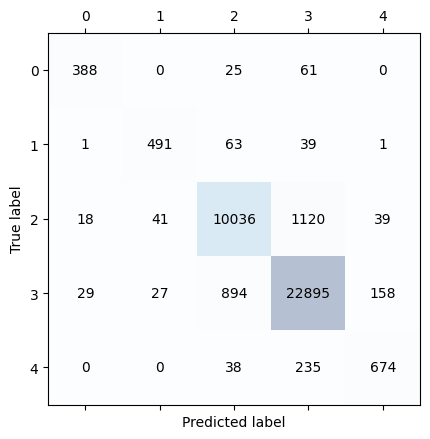

In [154]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/.png', dpi=300)
plt.show()



 1) Model Year                     0.173675
 2) x0_Plug-in Hybrid Electric Vehicle (PHEV) 0.063837
 3) x0_TESLA                       0.062166
 4) x0_Battery Electric Vehicle (BEV) 0.055560
 5) DOL Vehicle ID                 0.052057
 6) VIN (1-10)                     0.042438
 7) x0_Not eligible due to low battery range 0.039801
 8) x0_FORD                        0.029536
 9) x0_Eligibility unknown as battery range has not been researched 0.023414
10) Postal Code                    0.022237
11) Longitude                      0.020967
12) Latitude                       0.020953
13) City_priority                  0.016935
14) 2020 Census Tract              0.016671
15) Legislative District           0.015741
16) x0_RIVIAN                      0.014777
17) x0_Clean Alternative Fuel Vehicle Eligible 0.014528
18) x0_BMW                         0.013852
19) x0_MUSTANG MACH-E              0.013317
20) x0_VOLVO                       0.011819
21) x0_MODEL 3                     0.011766
22) Cou

C:\Users\David_Ninov\AppData\Local\Temp\ipykernel_12872\1225790261.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


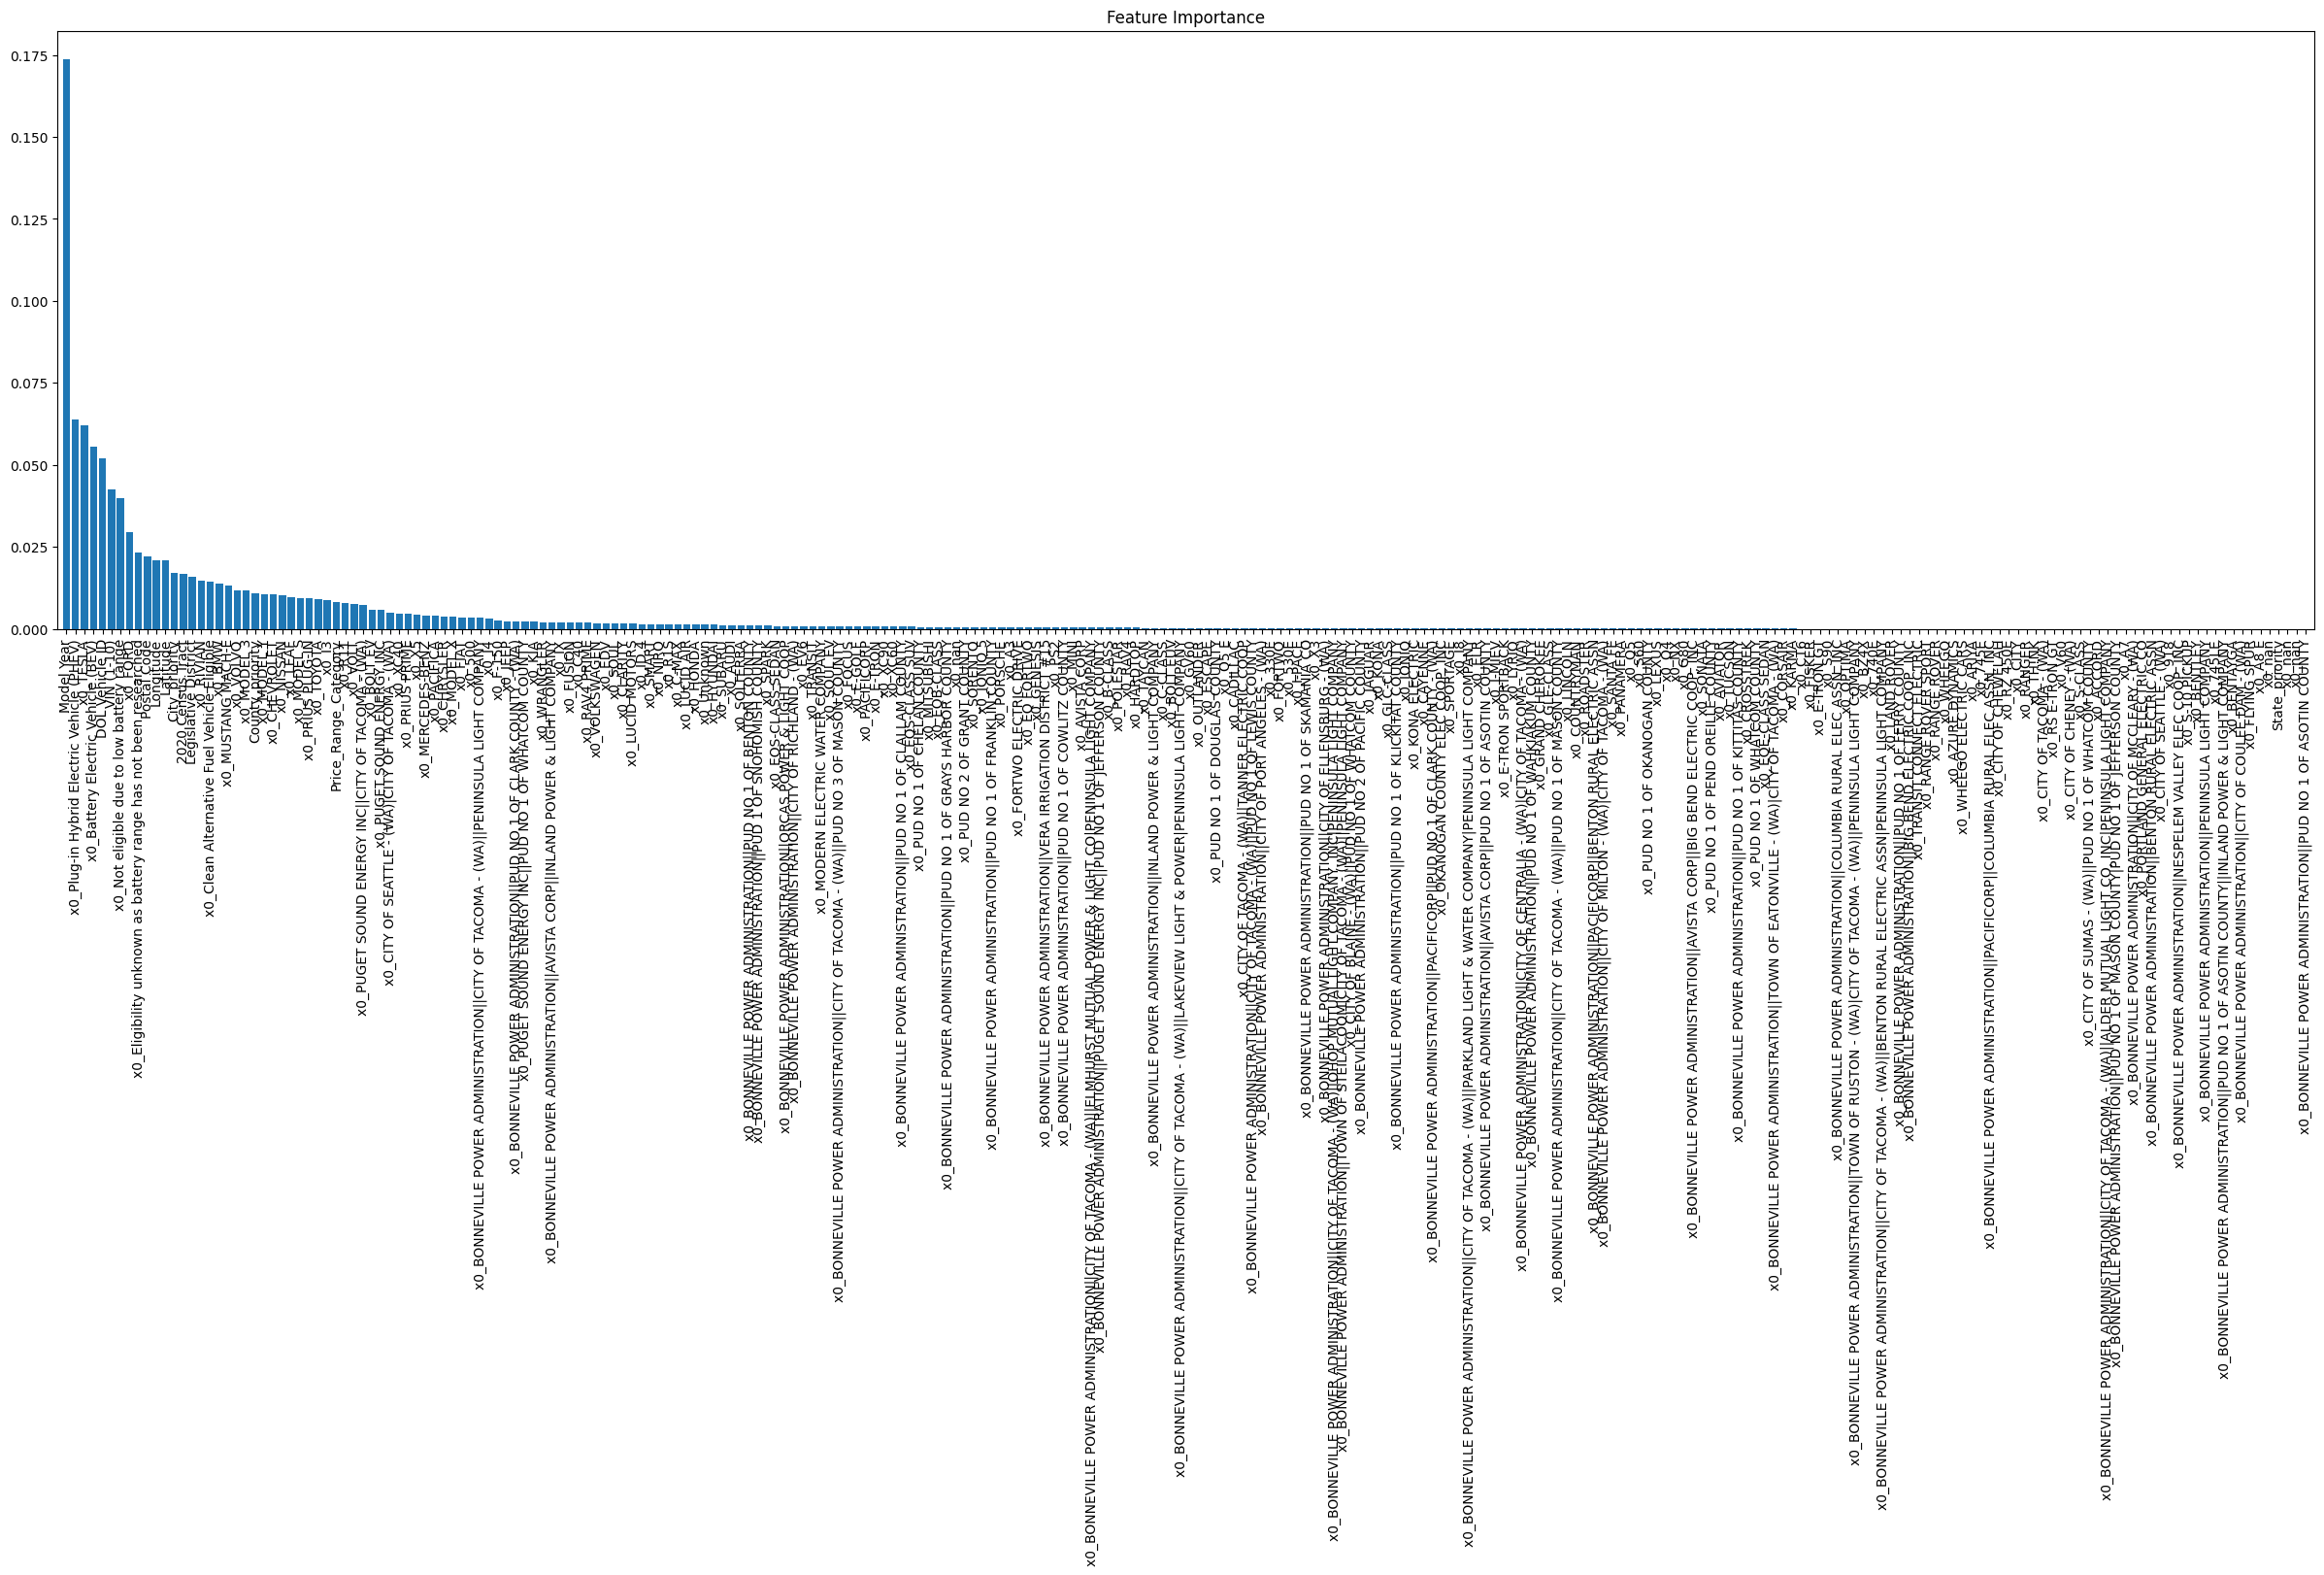

In [155]:

feat_labels = electric_vehicles_attributes_train.columns[0:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(electric_vehicles_attributes_train, electric_vehicles_labels_train)
#forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(electric_vehicles_attributes_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(electric_vehicles_attributes_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(electric_vehicles_attributes_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, electric_vehicles_attributes_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()



In [167]:
mlflow.log_artifact("data/Electric_Vehicle_Population_Data_old.csv")

In [168]:
 # Evaluate the model
accuracy = accuracy_score(electric_vehicles_labels_test, electric_vehicles_labels_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(electric_vehicles_labels_test, electric_vehicles_labels_pred, average='weighted')

# Print the classification report and confusion matrix for each classifier
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}\n')

Best Hyperparameters: {'classifier__max_depth': 18, 'classifier': DecisionTreeClassifier(random_state=1)}
Accuracy: 0.9252
Precision: 0.9246
Recall: 0.9252
F1 Score: 0.9247



In [169]:
print(classification_report(electric_vehicles_labels_test, electric_vehicles_labels_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       474
         1.0       0.88      0.83      0.85       595
         2.0       0.91      0.89      0.90     11254
         3.0       0.94      0.95      0.95     24003
         4.0       0.77      0.71      0.74       947

    accuracy                           0.93     37273
   macro avg       0.88      0.84      0.86     37273
weighted avg       0.92      0.93      0.92     37273



Base on this resilts we have consider cross-validation or testing on a separate dataset to ensure the generalization of the model.

In [170]:
 grid_search.best_params_

{'classifier__max_depth': 18,
 'classifier': DecisionTreeClassifier(random_state=1)}

In [185]:
#Parameters
mlflow.log_param("train_test_split", True)
mlflow.log_param("random_state", RANDOM_STATE)
mlflow.log_param("test_size", TEST_SIZE) 
mlflow.log_param("n_components", N_COMPONENTS)
mlflow.log_param("Best parameters", grid_search.best_params_)

# Log the best parameters
#mlflow.log_param("C", best_params['classifier__C'])
#mlflow.log_param("penalty", best_params['classifier__penalty'])

# Log the model
#mlflow.sklearn.log_model("LogisticRegression", "model")
#mlflow.log_model("LogisticRegression", "model")
#mlflow.log_

 # Infer the model signature
#signature = infer_signature(electric_vehicles_attributes_test, electric_vehicles_labels_pred)

mlflow.sklearn.log_model(
        sk_model=grid_search,
        artifact_path="sklearn-model",
 #       signature=signature,
        registered_model_name="DecisionTreeClassifier",
    )

# Metics
for train_step in range(100):
    mlflow.log_metric("test_metrics", train_step **2, step = train_step) # accuracy

mlflow.log_metrics({"mse": mean_squared_error(electric_vehicles_labels_test, electric_vehicles_labels_pred)})
mlflow.log_metrics({"Correct classification Rate Training data": grid_search.score(electric_vehicles_attributes_train,electric_vehicles_labels_train)})
mlflow.log_metrics({"Correct classification Rate Test data": grid_search.score(electric_vehicles_attributes_test,electric_vehicles_labels_test)})
mlflow.log_metrics({"Accuracy": accuracy})
mlflow.log_metrics({"Precision" : precision})
mlflow.log_metrics({"Recall" : recall})
mlflow.log_metrics({"F1 Score" : f1_score}) 
#mlflow.log_metrics({"CV accuracy scores" : scores)})
mlflow.log_metrics({"CV accuracy" : np.mean(scores)})
mlflow.log_metrics({"CV accuracy standard deviation" : np.std(scores)})
#mlflow.log_metrics({"Best Estimator" : grid_search.best_estimator_})


#mlflow.log_metrics({"Feature Importance" : importances})


C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\David_Ninov\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'DecisionTreeClassifier' already exists. Creating a new version of this model...
Created version '3' of model 'DecisionTreeClassifier'.


In [186]:
mlflow.end_run()